## Data exploration with cleaning:
### 1. Dataframe info.
### 2. Check and remove duplicated values
### 3. Check and handle Null values
### 4. Investigate Outliers

In [118]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
# Load the data. 
df = pd.read_csv('noshowappointments.csv')
# showing the first 5 lines of the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [1]:
# checking the info of the data (any issues to be handeled)

In [2]:
#Check dtypes property in the DataFrame


In [3]:
#number of columns and raws in data


In [ ]:
##Column names of Data frame

In [ ]:
#(Hipertension & No-show&Handcap) have to be corrected
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

## Descriptive Statistics
#### 1.mean 
#### 2.Var
#### 3. Std
#### 4. Median
#### 5.Max & Min

In [ ]:
#Summary for the data

In [ ]:
#Draw dist. of data 

## Data wrangling
### is the process of removing errors and combining complex data sets to make them more accessible and easier to analyze.

### Looking for Data that need to be cleaned

In [ ]:
#Checking for null values

In [ ]:
#find duplicate rows across all columns

In [ ]:
# check the number of duplicated pateint IDs$No_show

In [ ]:
# create a boxplot of the age using seaborn

## Convert AppointmentDay to datetime type

## Data Exploration And Visualization

### 1. What is the relation between gender and No. of pateints?

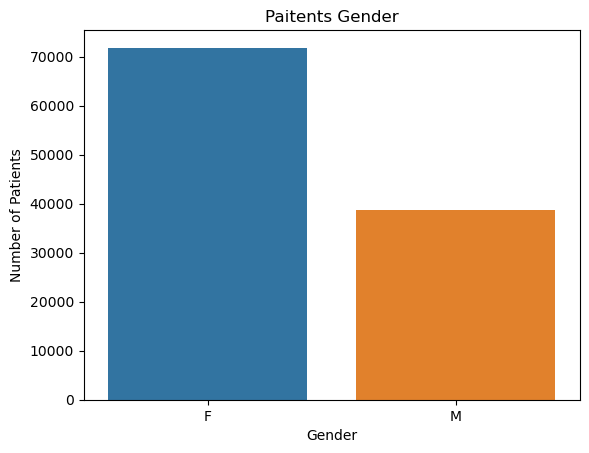

In [145]:
# plot a bar chart
sns.countplot(data = df, x ='Gender')
plt.title('Paitents Gender')
#plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

### 2. What is the relation between gender and Show or no show appointments?

In [146]:
# check value counts in no_show column
df.No_show.value_counts()

No     88205
Yes    22316
Name: No_show, dtype: int64

In [147]:
# NoShow column transformation
# if the value Yes then change it to 1, otherwise 0
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace=True)
# confirm
df.No_show.value_counts()

0    88205
1    22316
Name: No_show, dtype: int64

Text(0.5, 1.0, 'Paitents Show Status')

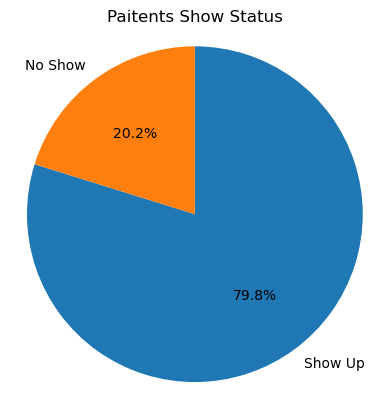

In [148]:
# plot a pie chart
sorted_counts = df.No_show.value_counts()
plt.pie(sorted_counts, labels = ['Show Up', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Status')

### 3. What is the relation between diabetes and age?

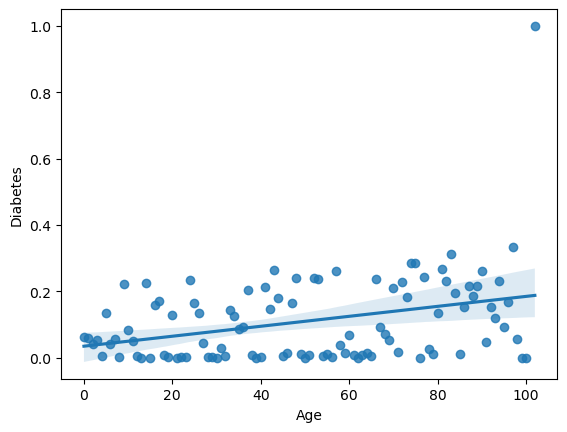

In [149]:
# age diabetes scatter with line fit
# there are more people with diabetes among older patients
diabetes_mean = df['Diabetes'].groupby(df['Age']).mean()
ages = df['Age'].unique()
sns.regplot(x = ages, y = diabetes_mean)
plt.xlabel('Age')
plt.show()

### 4. What is the distribution of age regarding count of appointments?

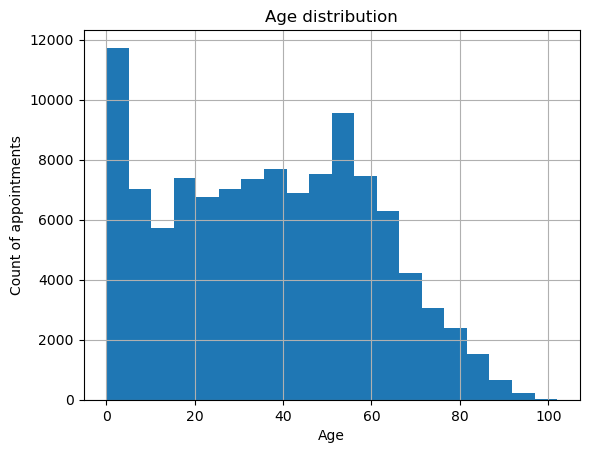

In [150]:
# age distribution
# young people have many appointments, which could be because of a number of mandatory medical visits at that age
g = df.Age.hist(bins=20);
g.set(xlabel = 'Age', ylabel = 'Count of appointments', title = 'Age distribution')
plt.show()